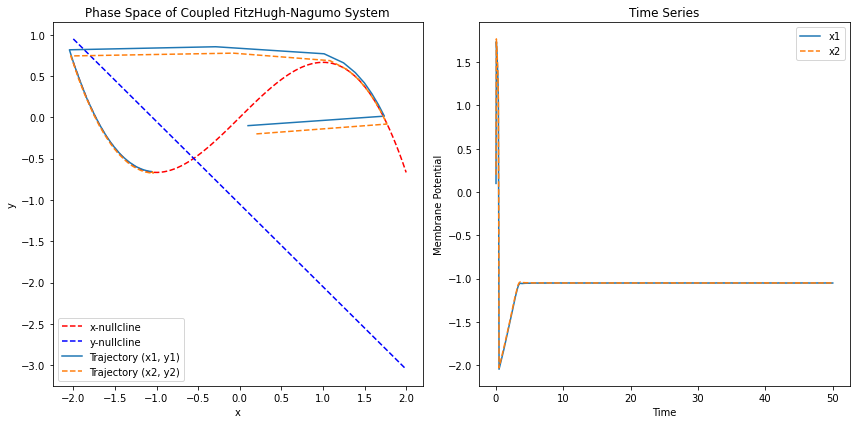

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# FitzHugh-Nagumo model parameters
epsilon = 0.01  # Time scale separation
a = 1.05  # Excitability parameter
C = 0.5  # Coupling strength
tau = 3.0  # Time delay

# Nullclines
def nullclines():
    x = np.linspace(-2, 2, 100)
    y1 = x - (x**3) / 3  # x-nullcline
    y2 = -x - a  # y-nullcline
    return x, y1, y2

# FitzHugh-Nagumo system without delay
def fhn(t, y):
    x1, y1, x2, y2 = y
    dx1_dt = (x1 - x1**3 / 3 - y1 + C * (x2 - x1)) / epsilon
    dy1_dt = x1 + a
    dx2_dt = (x2 - x2**3 / 3 - y2 + C * (x1 - x2)) / epsilon
    dy2_dt = x2 + a
    return [dx1_dt, dy1_dt, dx2_dt, dy2_dt]

# Solve without delay
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)
y0 = [0.1, -0.1, 0.2, -0.2]  # Initial conditions
sol = solve_ivp(fhn, t_span, y0, t_eval=t_eval)

# Plot results
plt.figure(figsize=(12, 6))

# Phase Space Plot
plt.subplot(1, 2, 1)
x, y1, y2 = nullclines()
plt.plot(x, y1, 'r--', label='x-nullcline')
plt.plot(x, y2, 'b--', label='y-nullcline')
plt.plot(sol.y[0], sol.y[1], label='Trajectory (x1, y1)')
plt.plot(sol.y[2], sol.y[3], label='Trajectory (x2, y2)', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Phase Space of Coupled FitzHugh-Nagumo System')

# Time Series
plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[0], label='x1')
plt.plot(sol.t, sol.y[2], label='x2', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.legend()
plt.title('Time Series')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint

# =================== Parameter Settings ===================
epsilon = 0.01   # Slow variable parameter
a = 1.05         # Excitability parameter
C = 0.5          # Coupling strength
tau = 3.0        # Time delay

# =================== History Function ===================
# The order for the 4D system is: [x1, y1, x2, y2]
def history(t):
    return np.array([0.1, -0.1, 0.2, -0.2])

# =================== Delay Differential Equation Model ===================
# Y(t) returns the current state, Y(t-tau) returns the delayed state
def model(Y, t):
    Y_t = Y(t)
    Y_tau = Y(t - tau)
    
    # Current state components
    x1, y1, x2, y2 = Y_t
    # Delayed state: x component
    x1_tau = Y_tau[0]
    x2_tau = Y_tau[2]
    
    # Define the system: the coupling term uses the delayed variable
    dx1_dt = (x1 - x1**3/3 - y1 + C * (x2_tau - x1)) / epsilon
    dy1_dt = x1 + a
    dx2_dt = (x2 - x2**3/3 - y2 + C * (x1_tau - x2)) / epsilon
    dy2_dt = x2 + a
    
    return np.array([dx1_dt, dy1_dt, dx2_dt, dy2_dt])

# =================== Solve the DDE ===================
T_final = 50
t = np.linspace(0, T_final, 10000)
sol = ddeint(model, history, t)

# =================== Nullclines Function ===================
def nullclines():
    # For illustration, we provide the nullcline for the uncoupled case
    x = np.linspace(-2, 2, 100)
    # x-nullcline: x - x^3/3 - y = 0  => y = x - x^3/3
    y_null = x - (x**3) / 3  
    # Another reference line, which can be seen as a simplified expression of the y-nullcline 
    # (Note: strictly speaking, for FHN, setting dy/dt = 0 yields x = -a)
    y_line = -x - a             
    return x, y_null, y_line

# =================== Compute the Vector Field ===================
# Since the system is 4D, we plot the vector field in the (x1, y1) and (x2, y2) planes separately.
# For simplicity, when computing the vector field we assume that the delayed state of the other oscillator is fixed at equilibrium.
# For the FitzHugh–Nagumo system, the equilibrium can be approximated as:
x_eq = -a            # Obtained from dy/dt = x + a = 0
# Also, using the x-nullcline relation we have: y_eq = x_eq - (x_eq^3)/3
y_eq = x_eq - (x_eq**3)/3

# Generate a mesh grid for the phase plane
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y_mesh = np.meshgrid(x_vals, y_vals)

# Vector field for Oscillator 1:
# In the (x1, y1) plane, assume that the delayed coupling term x2(t-tau) = x_eq
U1 = (X - X**3/3 - Y_mesh + C*(x_eq - X)) / epsilon   # dx1/dt
V1 = X + a                                            # dy1/dt

# Vector field for Oscillator 2:
# In the (x2, y2) plane, assume that the delayed coupling term x1(t-tau) = x_eq
U2 = (X - X**3/3 - Y_mesh + C*(x_eq - X)) / epsilon   # dx2/dt
V2 = X + a                                            # dy2/dt

# =================== Plotting ===================

# Figure 1: Phase plane for Oscillator 1 (including nullclines, vector field, and trajectory)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
# Plot nullclines
x_nc, nc_y, nc_y_line = nullclines()
plt.plot(x_nc, nc_y, 'r--', label='x-nullcline')
plt.plot(x_nc, nc_y_line, 'b--', label='y-nullcline')
# Plot vector field
plt.quiver(X, Y_mesh, U1, V1, color='gray', alpha=0.6)
# Plot trajectory (x1, y1) extracted from the numerical solution of the delay system
plt.plot(sol[:, 0], sol[:, 1], 'k-', lw=2, label='Trajectory (x1, y1)')
plt.xlabel('x1')
plt.ylabel('y1')
plt.title('Oscillator 1: Phase Plane with Delay')
plt.legend()
plt.grid(True)

# Figure 2: Phase plane for Oscillator 2 (including nullclines, vector field, and trajectory)
plt.subplot(1, 2, 2)
plt.plot(x_nc, nc_y, 'r--', label='x-nullcline')
plt.plot(x_nc, nc_y_line, 'b--', label='y-nullcline')
plt.quiver(X, Y_mesh, U2, V2, color='gray', alpha=0.6)
plt.plot(sol[:, 2], sol[:, 3], 'm-', lw=2, label='Trajectory (x2, y2)')
plt.xlabel('x2')
plt.ylabel('y2')
plt.title('Oscillator 2: Phase Plane with Delay')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Figure 3: Time series (showing the x components of both oscillators)
plt.figure(figsize=(10, 4))
plt.plot(t, sol[:, 0], label='x1')
plt.plot(t, sol[:, 2], label='x2', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.title('Time Series with Delay')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


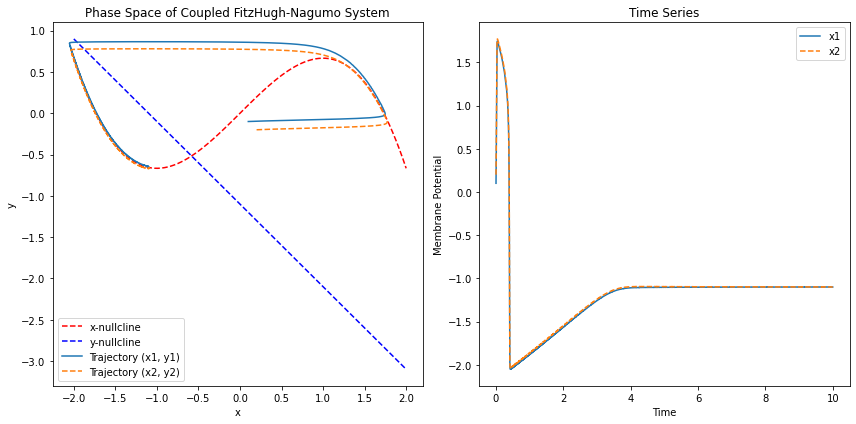

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# FitzHugh-Nagumo model parameters
epsilon = 0.01  # Time scale separation
a = 1.1        # Excitability parameter
C = 1.0         # Coupling strength
tau = 1.0       # Time delay
# Nullclines
def nullclines():
    x = np.linspace(-2, 2, 100)
    y1 = x - (x**3) / 3  # x-nullcline
    y2 = -x - a        # y-nullcline
    return x, y1, y2

# FitzHugh-Nagumo system without delay
def fhn(t, y):
    x1, y1, x2, y2 = y
    dx1_dt = (x1 - x1**3/3 - y1 + C * (x2 - x1)) / epsilon
    dy1_dt = x1 + a
    dx2_dt = (x2 - x2**3/3 - y2 + C * (x1 - x2)) / epsilon
    dy2_dt = x2 + a
    return [dx1_dt, dy1_dt, dx2_dt, dy2_dt]

# Solve ODE (无延迟)
t_span = (0, 10)
t_eval = np.linspace(*t_span, 10000)
y0 = [0.1, -0.1, 0.2, -0.2]  # Initial conditions

sol = solve_ivp(fhn, t_span, y0, t_eval=t_eval)

# Plot results
plt.figure(figsize=(12, 6))

# Phase Space Plot
plt.subplot(1, 2, 1)
x, nc_y1, nc_y2 = nullclines()
plt.plot(x, nc_y1, 'r--', label='x-nullcline')
plt.plot(x, nc_y2, 'b--', label='y-nullcline')
plt.plot(sol.y[0], sol.y[1], label='Trajectory (x1, y1)')
plt.plot(sol.y[2], sol.y[3], label='Trajectory (x2, y2)', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Phase Space of Coupled FitzHugh-Nagumo System')

# Time Series Plot
plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[0], label='x1')
plt.plot(sol.t, sol.y[2], label='x2', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.legend()
plt.title('Time Series')

plt.tight_layout()
plt.show()


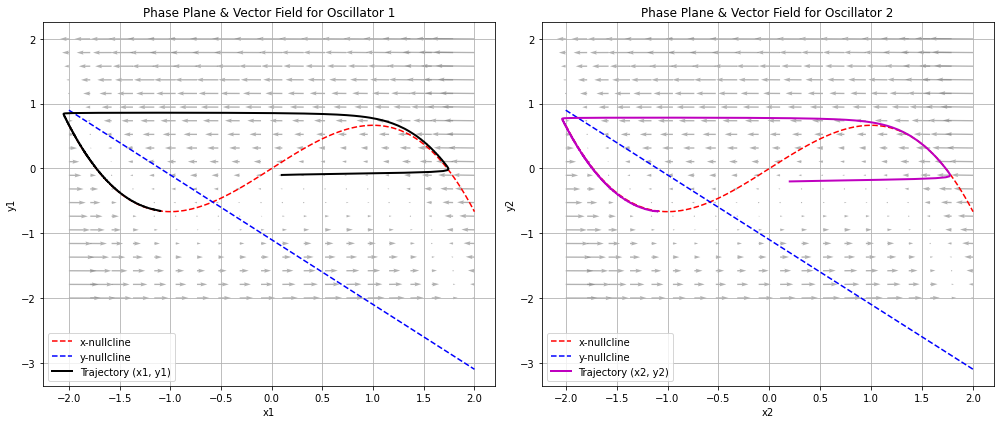

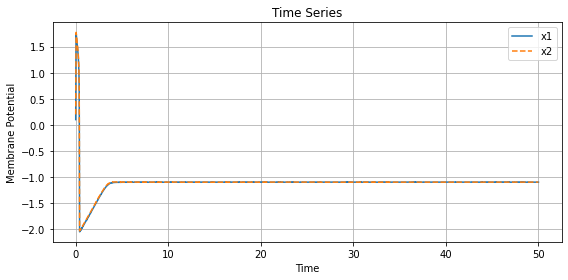

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# FitzHugh-Nagumo model parameters
epsilon = 0.01  # 慢变量参数
a = 1.1        # 兴奋性参数
C = 0.5         # 耦合强度
tau = 3.0       # 延迟时间（当前未用于求解，仅作为参数保留）

# Nullclines函数（用于单振子，无耦合时的情形）
def nullclines():
    x = np.linspace(-2, 2, 100)
    y_null = x - (x**3) / 3     # x-nullcline: x - x^3/3 - y = 0  => y = x - x^3/3
    y_line = -x - a             # 另一条参考线，可理解为“y-nullcline”在某些形式下的表达
    return x, y_null, y_line

# FitzHugh-Nagumo系统（4 维耦合，未考虑延迟项）
def fhn(t, y):
    x1, y1, x2, y2 = y
    dx1_dt = (x1 - x1**3/3 - y1 + C * (x2 - x1)) / epsilon
    dy1_dt = x1 + a
    dx2_dt = (x2 - x2**3/3 - y2 + C * (x1 - x2)) / epsilon
    dy2_dt = x2 + a
    return [dx1_dt, dy1_dt, dx2_dt, dy2_dt]

# 求解无延迟的系统
t_span = (0, 50)
t_eval = np.linspace(*t_span, 10000)
y0 = [0.1, -0.1, 0.2, -0.2]  # 初始条件
sol = solve_ivp(fhn, t_span, y0, t_eval=t_eval)

# 为 vector field 取网格
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# 由于4维耦合系统难以直接在4维中画向量场，
# 这里我们对每个振子分别作图，并假定另一振子的 x 分量始终处于其平衡值 x_eq = -a。
x_eq = -a

# 计算振子1的向量场：假设 x2 = x_eq
U1 = (X - X**3/3 - Y + C*(x_eq - X)) / epsilon  # dx1/dt
V1 = X + a                                    # dy1/dt

# 计算振子2的向量场：假设 x1 = x_eq
U2 = (X - X**3/3 - Y + C*(x_eq - X)) / epsilon  # dx2/dt
V2 = X + a                                    # dy2/dt

# 绘制结果
plt.figure(figsize=(14, 6))

# 子图1：振子1的相平面及 vector field
plt.subplot(1, 2, 1)
# 绘制 nullclines
x_nc, nc_y, nc_y_line = nullclines()
plt.plot(x_nc, nc_y, 'r--', label='x-nullcline')
plt.plot(x_nc, nc_y_line, 'b--', label='y-nullcline')
# 绘制 vector field（箭头场）
plt.quiver(X, Y, U1, V1, color='gray', alpha=0.6)
# 绘制轨迹 (x1, y1)
plt.plot(sol.y[0], sol.y[1], 'k-', lw=2, label='Trajectory (x1, y1)')
plt.xlabel('x1')
plt.ylabel('y1')
plt.title('Phase Plane & Vector Field for Oscillator 1')
plt.legend()
plt.grid(True)

# 子图2：振子2的相平面及 vector field
plt.subplot(1, 2, 2)
# 同样绘制 nullclines（如果希望反映相同结构）
plt.plot(x_nc, nc_y, 'r--', label='x-nullcline')
plt.plot(x_nc, nc_y_line, 'b--', label='y-nullcline')
# 绘制 vector field，使用振子2的计算（假定 x1 = x_eq）
plt.quiver(X, Y, U2, V2, color='gray', alpha=0.6)
# 绘制轨迹 (x2, y2)
plt.plot(sol.y[2], sol.y[3], 'm-', lw=2, label='Trajectory (x2, y2)')
plt.xlabel('x2')
plt.ylabel('y2')
plt.title('Phase Plane & Vector Field for Oscillator 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 另外，绘制时间序列图（两个振子 x 分量）
plt.figure(figsize=(8, 4))
plt.plot(sol.t, sol.y[0], label='x1')
plt.plot(sol.t, sol.y[2], label='x2', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.title('Time Series')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


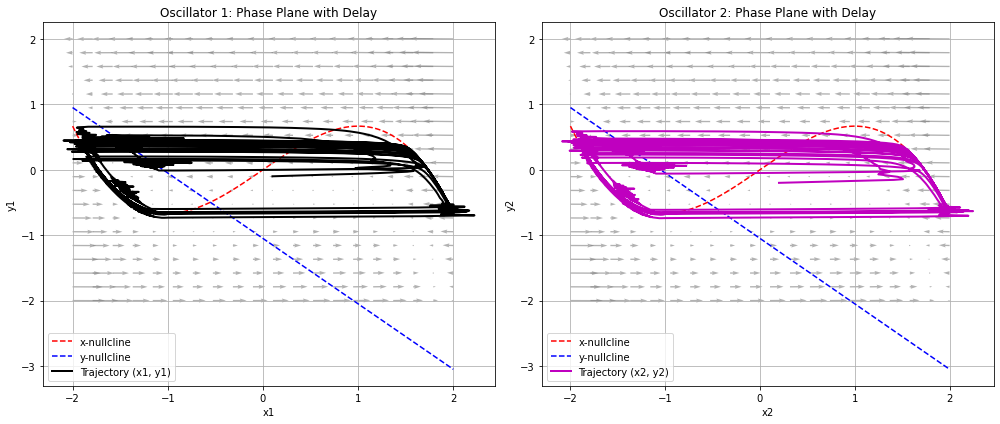

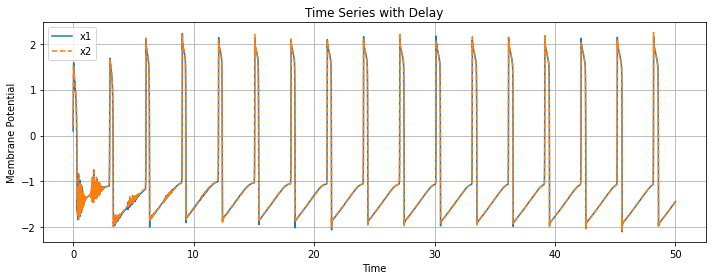

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint

# =================== 参数设置 ===================
epsilon = 0.01   # 慢变量参数
a = 1.05         # 兴奋性参数
C = 0.5          # 耦合强度
tau = 3.0        # 延迟时间

# =================== 历史函数 ===================
# 4 维系统顺序为：[x1, y1, x2, y2]
def history(t):
    return np.array([0.1, -0.1, 0.2, -0.2])

# =================== 延迟微分方程模型 ===================
# Y(t) 返回当前状态，Y(t-tau) 返回延迟状态
def model(Y, t):
    Y_t = Y(t)
    Y_tau = Y(t - tau)
    
    # 当前状态分量
    x1, y1, x2, y2 = Y_t
    # 延迟状态中 x 分量
    x1_tau = Y_tau[0]
    x2_tau = Y_tau[2]
    
    # 定义系统：耦合项用延迟变量
    dx1_dt = (x1 - x1**3/3 - y1 + C * (x2_tau - x1)) / epsilon
    dy1_dt = x1 + a
    dx2_dt = (x2 - x2**3/3 - y2 + C * (x1_tau - x2)) / epsilon
    dy2_dt = x2 + a
    
    return np.array([dx1_dt, dy1_dt, dx2_dt, dy2_dt])

# =================== 数值求解 DDE ===================
T_final = 50
t = np.linspace(0, T_final, 10000)
sol = ddeint(model, history, t)

# =================== Nullclines 函数 ===================
def nullclines():
    # 为方便展示，这里给出无耦合时的 nullcline 形式
    x = np.linspace(-2, 2, 100)
    # x-nullcline: x - x^3/3 - y = 0  => y = x - x^3/3
    y_null = x - (x**3) / 3  
    # 另一参考线，可视为 y-nullcline 在某种简化情形下的表达（注意：严格来说对于 FHN, dy/dt = 0 只给出 x = -a）
    y_line = -x - a             
    return x, y_null, y_line

# =================== Vector Field 计算 ===================
# 由于系统是 4 维的，这里分别在 (x1,y1) 和 (x2,y2) 平面绘制 vector field
# 为简单起见，在计算 vector field 时，假设另一振子的延迟状态均取平衡值。
# 对于 FitzHugh-Nagumo 系统，平衡值可以近似取：
x_eq = -a            # 由 dy/dt = x + a = 0 得到
# 同时，利用 x-nullcline关系可得： y_eq = x_eq - (x_eq^3)/3
y_eq = x_eq - (x_eq**3)/3

# 生成相平面网格
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y_mesh = np.meshgrid(x_vals, y_vals)

# 对振子1的 vector field：
# 在 (x1, y1) 平面中，假设延迟耦合项中 x2(t-tau) = x_eq
U1 = (X - X**3/3 - Y_mesh + C*(x_eq - X)) / epsilon   # dx1/dt
V1 = X + a                                           # dy1/dt

# 对振子2的 vector field：
# 在 (x2, y2) 平面中，假设延迟耦合项中 x1(t-tau) = x_eq
U2 = (X - X**3/3 - Y_mesh + C*(x_eq - X)) / epsilon   # dx2/dt
V2 = X + a                                           # dy2/dt

# =================== 绘制图形 ===================

# 图1：振子1相平面（包含 nullclines、vector field 及轨迹）
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
# 绘制 nullclines
x_nc, nc_y, nc_y_line = nullclines()
plt.plot(x_nc, nc_y, 'r--', label='x-nullcline')
plt.plot(x_nc, nc_y_line, 'b--', label='y-nullcline')
# 绘制 vector field
plt.quiver(X, Y_mesh, U1, V1, color='gray', alpha=0.6)
# 绘制轨迹 (x1, y1) 提取自延迟系统数值解
plt.plot(sol[:, 0], sol[:, 1], 'k-', lw=2, label='Trajectory (x1, y1)')
plt.xlabel('x1')
plt.ylabel('y1')
plt.title('Oscillator 1: Phase Plane with Delay')
plt.legend()
plt.grid(True)

# 图2：振子2相平面（包含 nullclines、vector field 及轨迹）
plt.subplot(1, 2, 2)
plt.plot(x_nc, nc_y, 'r--', label='x-nullcline')
plt.plot(x_nc, nc_y_line, 'b--', label='y-nullcline')
plt.quiver(X, Y_mesh, U2, V2, color='gray', alpha=0.6)
plt.plot(sol[:, 2], sol[:, 3], 'm-', lw=2, label='Trajectory (x2, y2)')
plt.xlabel('x2')
plt.ylabel('y2')
plt.title('Oscillator 2: Phase Plane with Delay')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 图3：时间序列（显示两个振子 x 分量）
plt.figure(figsize=(10, 4))
plt.plot(t, sol[:, 0], label='x1')
plt.plot(t, sol[:, 2], label='x2', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.title('Time Series with Delay')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\JaniceWen\AppData\Local\Temp\ipykernel_848\447057331.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, Y1, nullcline_x1, levels=[0], colors='r', label='Nullcline for x1')
C:\Users\JaniceWen\AppData\Local\Temp\ipykernel_848\447057331.py:44: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, Y1, nullcline_y1, levels=[0], colors='b', label='Nullcline for y1')


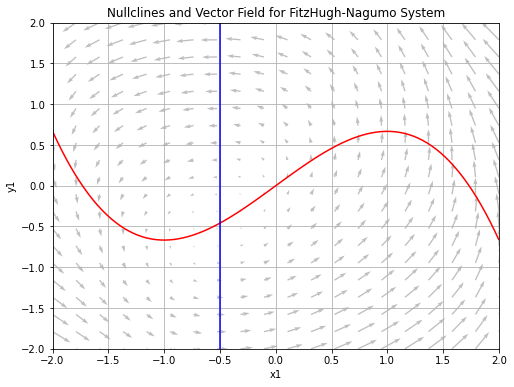

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epsilon1 = 0.005
epsilon2 = 0.005
a = 0.5
C = 0.1
K = 0.5
tau_K = 0.5
T_final = 50
t = np.linspace(0, T_final, 10000)

# Define the system of equations
def fitzhugh_nagumo_system(t, Y):
    x1, y1, x2, y2 = Y
    dx1_dt = x1 - (x1**3)/3 - y1 + C*(x2 - x1)
    dy1_dt = x1 + a + K*(y1 - y1)  # Assuming delay is incorporated for the second term
    dx2_dt = x2 - (x2**3)/3 - y2 + C*(x1 - x2)
    dy2_dt = x2 + a
    return [dx1_dt, dy1_dt, dx2_dt, dy2_dt]

# Plot nullclines
x1_vals = np.linspace(-2, 2, 100)
y1_vals = np.linspace(-2, 2, 100)
X1, Y1 = np.meshgrid(x1_vals, y1_vals)

# Nullcline for x1 (dx1/dt = 0)
nullcline_x1 = X1 - (X1**3) / 3 - Y1

# Nullcline for y1 (dy1/dt = 0)
nullcline_y1 = X1 + a

# Create the vector field for visualization
Y1_vals = np.linspace(-2, 2, 20)
X1_vals = np.linspace(-2, 2, 20)
X1_grid, Y1_grid = np.meshgrid(X1_vals, Y1_vals)
dx1_vals = X1_grid - (X1_grid**3) / 3 - Y1_grid
dy1_vals = X1_grid + a

# Plot the nullclines
plt.figure(figsize=(8, 6))
plt.contour(X1, Y1, nullcline_x1, levels=[0], colors='r', label='Nullcline for x1')
plt.contour(X1, Y1, nullcline_y1, levels=[0], colors='b', label='Nullcline for y1')

# Vector field
plt.quiver(X1_grid, Y1_grid, dx1_vals, dy1_vals, color='gray', alpha=0.5)

plt.xlabel('x1')
plt.ylabel('y1')
plt.title('Nullclines and Vector Field for FitzHugh-Nagumo System')
plt.grid(True)
plt.show()


C:\Users\JaniceWen\AppData\Local\Temp\ipykernel_848\192308443.py:46: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, Y1, nullcline_x1, levels=[0], colors='r', label='Nullcline for x1')
C:\Users\JaniceWen\AppData\Local\Temp\ipykernel_848\192308443.py:47: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, Y1, nullcline_y1, levels=[0], colors='b', label='Nullcline for y1')


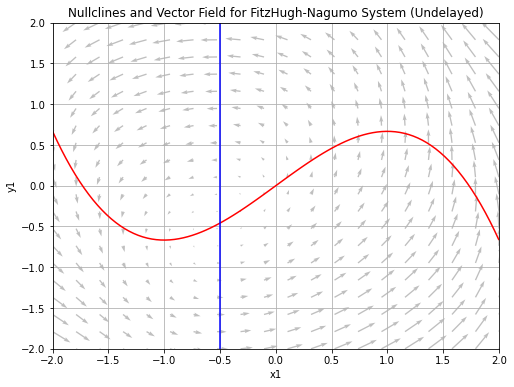

In [19]:
import numpy as np 
import matplotlib.pyplot as plt

# Parameters
epsilon1 = 0.005
epsilon2 = 0.005
a = 0.5
C = 0.1
K = 0.5
T_final = 50
t = np.linspace(0, T_final, 10000)

# Define the system of equations (undelayed)
def fitzhugh_nagumo_system(t, Y):
    x1, y1, x2, y2 = Y
    # dx1/dt = x1 - (x1^3)/3 - y1 + C*(x2 - x1)
    dx1_dt = x1 - (x1**3)/3 - y1 + C*(x2 - x1)
    # dy1/dt = x1 + a
    dy1_dt = x1 + a
    # dx2/dt = x2 - (x2^3)/3 - y2 + C*(x1 - x2)
    dx2_dt = x2 - (x2**3)/3 - y2 + C*(x1 - x2)
    # dy2/dt = x2 + a
    dy2_dt = x2 + a
    return [dx1_dt, dy1_dt, dx2_dt, dy2_dt]

# Plot nullclines
x1_vals = np.linspace(-2, 2, 100)
y1_vals = np.linspace(-2, 2, 100)
X1, Y1 = np.meshgrid(x1_vals, y1_vals)

# Nullcline for x1 (dx1/dt = 0)
nullcline_x1 = X1 - (X1**3) / 3 - Y1

# Nullcline for y1 (dy1/dt = 0)
nullcline_y1 = X1 + a

# Create the vector field for visualization
Y1_vals = np.linspace(-2, 2, 20)
X1_vals = np.linspace(-2, 2, 20)
X1_grid, Y1_grid = np.meshgrid(X1_vals, Y1_vals)
dx1_vals = X1_grid - (X1_grid**3) / 3 - Y1_grid
dy1_vals = X1_grid + a

# Plot the nullclines
plt.figure(figsize=(8, 6))
plt.contour(X1, Y1, nullcline_x1, levels=[0], colors='r', label='Nullcline for x1')
plt.contour(X1, Y1, nullcline_y1, levels=[0], colors='b', label='Nullcline for y1')

# Vector field
plt.quiver(X1_grid, Y1_grid, dx1_vals, dy1_vals, color='gray', alpha=0.5)

plt.xlabel('x1')
plt.ylabel('y1')
plt.title('Nullclines and Vector Field for FitzHugh-Nagumo System (Undelayed)')
plt.grid(True)
plt.show()


In [14]:
pip install ddeint


Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint

# Parameters
epsilon1 = 0.005
epsilon2 = 0.005
a = 0.5
C = 0.1
K = 0.5
tau_K = 0.5
T_final = 50
t = np.linspace(0, T_final, 10000)

# Define the system of equations with delays
def fitzhugh_nagumo_system(t, Y, history):
    x1, y1, x2, y2 = Y
    # Get the delayed values for x1 and y1
    x1_delayed, y1_delayed = history(t - tau_K)  # Access the past state from history
    dx1_dt = x1 - (x1**3)/3 - y1 + C*(x2 - x1)
    dy1_dt = x1 + a + K*(y1_delayed - y1)
    dx2_dt = x2 - (x2**3)/3 - y2 + C*(x1 - x2)
    dy2_dt = x2 + a
    return [dx1_dt, dy1_dt, dx2_dt, dy2_dt]

# History function (initial conditions)
def history(t):
    # Assuming initial conditions for x1 and y1
    # The history function returns the values of x1 and y1 at the previous time
    # Assuming the system starts from a stable fixed point at t=0
    return [0, 0]  # Returning zero for both x1 and y1

# Solve the DDE system using ddeint
sol = ddeint(fitzhugh_nagumo_system, history, t)

# Extract the solution for x1, y1, x2, y2
X1_vals = sol[:, 0]
Y1_vals = sol[:, 1]

# Plot the time series for x1 and y1
plt.figure(figsize=(10, 6))
plt.plot(t, X1_vals, label='x1')
plt.plot(t, Y1_vals, label='y1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series for x1 and y1 (DDE System)')
plt.legend()
plt.grid(True)
plt.show()

# Vector field for the nullclines
def nullclines(t, X1, Y1, X2, Y2):
    nullcline_x1 = X1 - (X1**3) / 3 - Y1 + C*(X2 - X1)
    nullcline_y1 = X1 + a + K*(Y1 - Y1)  # Delay term assumed for y1 feedback
    return nullcline_x1, nullcline_y1

# Plot the nullclines and vector field
x1_vals = np.linspace(-2, 2, 100)
y1_vals = np.linspace(-2, 2, 100)
X1, Y1 = np.meshgrid(x1_vals, y1_vals)

nullcline_x1, nullcline_y1 = nullclines(0, X1, Y1, X1, Y1)

# Plotting the nullclines
plt.figure(figsize=(8, 6))
plt.contour(X1, Y1, nullcline_x1, levels=[0], colors='r', label='Nullcline for x1')
plt.contour(X1, Y1, nullcline_y1, levels=[0], colors='b', label='Nullcline for y1')

# Create a simple vector field to visualize the system's dynamics
Y1_vals = np.linspace(-2, 2, 20)
X1_vals = np.linspace(-2, 2, 20)
X1_grid, Y1_grid = np.meshgrid(X1_vals, Y1_vals)

dx1_vals = X1_grid - (X1_grid**3) / 3 - Y1_grid + C * (X1_grid - X1_grid)
dy1_vals = X1_grid + a

plt.quiver(X1_grid, Y1_grid, dx1_vals, dy1_vals, color='gray', alpha=0.5)

plt.xlabel('x1')
plt.ylabel('y1')
plt.title('Nullclines and Vector Field for FitzHugh-Nagumo System with Delays')
plt.grid(True)
plt.show()


TypeError: fitzhugh_nagumo_system() missing 1 required positional argument: 'history'

c:\Users\JaniceWen\anaconda3\lib\site-packages\scipy\integrate\_ode.py:1013: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


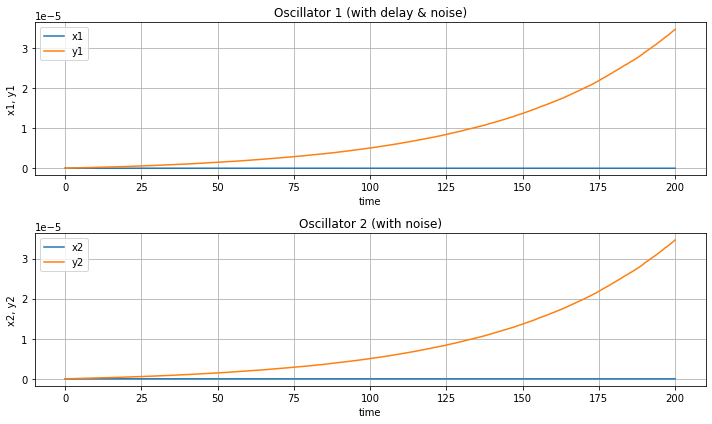

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint

# ========== 参数设置 ==========
eps1 = 0.08
eps2 = 0.08
a = 0.7
C = 0.1
K = 0.2
tauK = 2.0  # 延迟时长
D1 = 0.05
D2 = 0.03

# ========== 定义系统 ==========
def model(Y, t):
    """
    Y(t) = [x1(t), y1(t), x2(t), y2(t)]
    """
    x1, y1, x2, y2 = Y(t)
    # 延迟量: y1(t - tauK)
    y1_tau = Y(t - tauK)[1]  # 索引1对应y1
    
    # 噪声项: 这里做一个简单的近似, 每次调用时加一个随机值
    # 如果想要更严格的随机微分方程解法，需要用SDE求解器
    xi1 = np.random.normal(0, 1) * np.sqrt(D1)
    xi2 = np.random.normal(0, 1) * np.sqrt(D2)
    
    dx1dt = (1/eps1)*( x1 - x1**3/3 - y1 + C*(x2 - x1) )
    dy1dt = x1 + a + K*(y1_tau - y1) + xi1
    dx2dt = (1/eps2)*( x2 - x2**3/3 - y2 + C*(x1 - x2) )
    dy2dt = x2 + a + xi2
    
    return np.array([dx1dt, dy1dt, dx2dt, dy2dt])

# 初始条件以及历史函数(在 t<0 时给定)
def initial_history(t):
    # 可以简单设置为常数或小扰动
    return np.array([0.0, 0.0, 0.0, 0.0])

# ========== 时间区间 ==========
t_max = 200
t_eval = np.linspace(0, t_max, 2000)

# ========== 数值求解 DDE ==========
sol = ddeint(model, initial_history, t_eval)

x1_sol = sol[:,0]
y1_sol = sol[:,1]
x2_sol = sol[:,2]
y2_sol = sol[:,3]

# ========== 绘制时间序列 ==========
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(t_eval, x1_sol, label='x1')
plt.plot(t_eval, y1_sol, label='y1')
plt.xlabel('time')
plt.ylabel('x1, y1')
plt.title('Oscillator 1 (with delay & noise)')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t_eval, x2_sol, label='x2')
plt.plot(t_eval, y2_sol, label='y2')
plt.xlabel('time')
plt.ylabel('x2, y2')
plt.title('Oscillator 2 (with noise)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


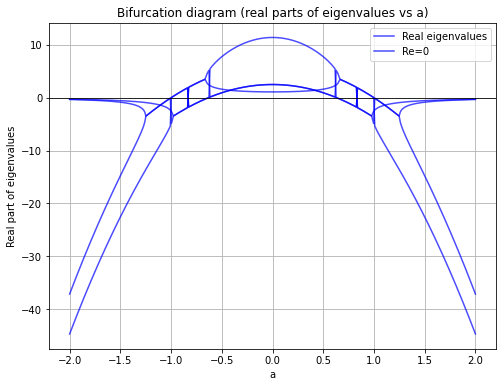

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ========== 参数 ========== 
eps1 = 0.08
eps2 = 0.08
C    = 0.3   # 耦合强度(示例)
# 我们把 a 作为分岔参数

# a 的扫描范围
a_values = np.linspace(-2.0, 2.0, 400)

# 用于保存所有特征值的实部
real_parts = []

for a in a_values:
    # 构造雅可比矩阵
    alpha = 1 - a**2 - C  # = 1 - (x^*)^2 - C
    J = np.array([
        [ alpha/eps1,     -1/eps1,       C/eps1,      0     ],
        [ 1.0,           0.0,           0.0,         0.0   ],
        [ C/eps2,        0.0,           alpha/eps2,  -1/eps2],
        [ 0.0,           0.0,           1.0,         0.0   ]
    ], dtype=float)

    # 计算特征值
    eigvals = np.linalg.eigvals(J)
    # 取实部
    real_eigs = np.real(eigvals)
    # 保存(为了后面画图)
    real_parts.append(real_eigs)

# real_parts 是一个 list, 其中每个元素都是长度=4的实部数组
real_parts = np.array(real_parts).T  # 转置一下, shape变为(4, len(a_values))

# ========== 作图 ========== 
plt.figure(figsize=(8,6))
for i in range(4):
    plt.plot(a_values, real_parts[i], label=f'Re(λ_{i+1})' if i==0 else None,
             color='b', alpha=0.7)
plt.axhline(0, color='k', linewidth=0.8)
plt.xlabel('a')
plt.ylabel('Real part of eigenvalues')
plt.title('Bifurcation diagram (real parts of eigenvalues vs a)')
plt.grid(True)
plt.legend(['Real eigenvalues','Re=0'])
plt.show()


C:\Users\JaniceWen\AppData\Local\Temp\ipykernel_848\1763046243.py:35: RuntimeWarning: overflow encountered in double_scalars
  dx1dt = ( x1 - (x1**3)/3 - y1 + c_val*(x2_tau - x1) ) / epsilon
C:\Users\JaniceWen\AppData\Local\Temp\ipykernel_848\1763046243.py:37: RuntimeWarning: overflow encountered in double_scalars
  dx2dt = ( x2 - (x2**3)/3 - y2 + c_val*(x1_tau - x2) ) / epsilon
c:\Users\JaniceWen\anaconda3\lib\site-packages\scipy\integrate\_ode.py:1013: UserWarning: vode: Repeated convergence failures. (Perhaps bad Jacobian supplied or wrong choice of MF or tolerances.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
c:\Users\JaniceWen\anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:630: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\JaniceWen\anaconda3\lib\site-packages\scipy\integrate\_ode.py:1013: UserWarning: vode: Illegal input detected. (See printed message.)
  warnings.warn('{:s}: {:s}

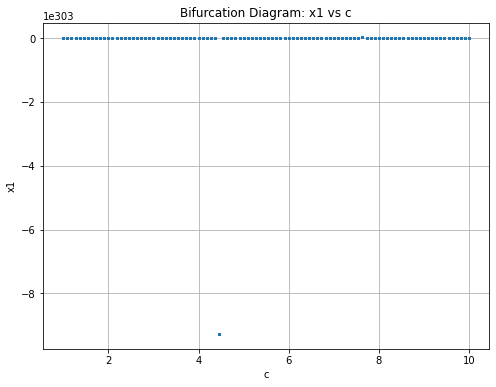

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint

# ========== 参数 ==========
epsilon = 0.005      # 慢变量参数
tau = 1              # 延迟时间
a = 0.5              # 固定 a 值
c_range = np.linspace(1, 10, 100)  # c 的取值范围
T_final = 50         # 总时间
t = np.linspace(0, T_final, 10000) # 时间向量

# ========== 初始历史函数 (4 维) ==========
# 顺序为: [x1, y1, x2, y2]
history = lambda t: np.array([0.0, 0.0, 0.0, 0.0])

# 用于存储分岔图数据
x1_vals = []   # 收集 x1 的后期值
c_vals = []    # 对应的 c 值

# ========== 扫描不同的 c ==========
for c_val in c_range:
    # 定义 4 维延迟微分方程模型
    def model(Y, t):
        # Y(t) 返回当前状态, Y(t-tau) 返回延迟状态
        Y_t = Y(t)
        Y_tau = Y(t - tau)
        # 提取当前状态分量
        x1, y1, x2, y2 = Y_t
        # 延迟状态: x1_tau 和 x2_tau
        x1_tau = Y_tau[0]
        x2_tau = Y_tau[2]
        
        # 4 维系统
        dx1dt = ( x1 - (x1**3)/3 - y1 + c_val*(x2_tau - x1) ) / epsilon
        dy1dt = x1 + a
        dx2dt = ( x2 - (x2**3)/3 - y2 + c_val*(x1_tau - x2) ) / epsilon
        dy2dt = x2 + a
        return np.array([dx1dt, dy1dt, dx2dt, dy2dt])
    
    # 使用 ddeint 求解延迟微分方程
    sol = ddeint(model, history, t)
    
    # 提取 x1(t) 的数值解
    X1_vals = sol[:, 0]
    
    # 选取末尾部分数据，代表系统稳态的数值
    last_points = X1_vals[-500:]
    
    # 收集数据
    x1_vals.extend(last_points)
    c_vals.extend([c_val] * len(last_points))

# ========== 绘制分岔图 ==========
plt.figure(figsize=(8,6))
plt.plot(c_vals, x1_vals, '.', markersize=1)
plt.xlabel('c')
plt.ylabel('x1')
plt.title('Bifurcation Diagram: x1 vs c')
plt.grid(True)
plt.show()


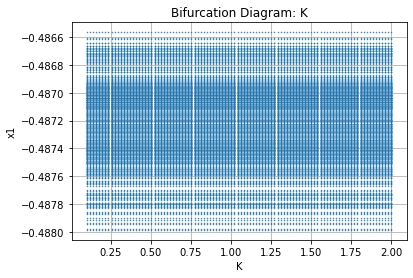

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 设置参数
epsilon1 = 0.005  # 慢变量参数1
epsilon2 = 0.005  # 慢变量参数2
a = 0.5  # 固定a值
K = 0.5  # 自反馈强度
C = 1.0  # 耦合常数
tau_K = 1.0  # 延迟时间
T_final = 50  # 总时间
t = np.linspace(0, T_final, 10000)  # 时间向量

# 历史函数
def history(t):
    return [0, 0]  # 初始条件

# 定义延迟微分方程模型
def model(t, Y, Z):
    x1, y1, x2, y2 = Y  # 解的四个变量
    x1_delay, y1_delay = Z[0], Z[1]  # 延迟变量

    dx1_dt = (-x1**3 / 3 - y1 + C * (x2 - x1)) / epsilon1  # x1的方程
    dy1_dt = x1 + a + K * (y1_delay - y1)  # y1的方程
    
    dx2_dt = (-x2**3 / 3 - y2 + C * (x1 - x2)) / epsilon2  # x2的方程
    dy2_dt = x2 + a  # y2的方程
    
    # 返回状态变量的变化
    return [dx1_dt, dy1_dt, dx2_dt, dy2_dt]

# 存储分岔图数据
x_vals = []
c_vals = []

# 对不同的K值进行循环（可以是耦合常数C或延迟时间等，具体选择）
K_range = np.linspace(0.1, 2.0, 100)

for K_val in K_range:
    # 在延迟微分方程中模拟
    def dde_model(t, Y, Z):
        return model(t, Y, Z)
    
    # 初始条件和延迟历史
    initial_conditions = [0, 0, 0, 0]
    delay_history = lambda t: [0, 0]
    
    # 求解系统
    sol = solve_ivp(lambda t, Y: dde_model(t, Y, delay_history(t)), [0, T_final], initial_conditions, t_eval=t)
    
    # 获取解
    X1_vals = sol.y[0, :]
    Y1_vals = sol.y[1, :]
    
    # 选择稳态解（最后500个点）
    last_points = X1_vals[-500:]
    x_vals.extend(last_points)
    c_vals.extend([K_val] * len(last_points))

# 绘制分岔图
plt.figure()
plt.plot(c_vals, x_vals, '.', markersize=1)
plt.xlabel('K')
plt.ylabel('x1')
plt.title('Bifurcation Diagram: K')
plt.grid(True)
plt.show()


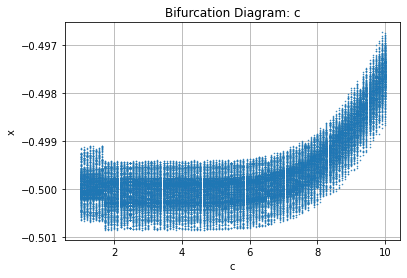

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 设置其他参数
epsilon = 0.005  # 慢变量参数
tau = 1  # 延迟时间
a = 0.5  # 固定a值
c_range = np.linspace(1, 10, 100)  # c的取值范围
T_final = 50  # 总时间
t = np.linspace(0, T_final, 10000)  # 时间向量
history = lambda t: [0, 0]  # 初始条件函数

# 存储分岔图数据
x_vals = []
c_vals = []

# 对不同的c值进行循环
for c_val in c_range:
    # 定义延迟微分方程模型
    def model(t, Y, Z):
        return [
            (Y[0] - (Y[0]**3)/3 - Y[1] + c_val * (Z[0] - Y[0])) / epsilon,  # X方程
            Y[0] + a  # Y方程
        ]

    # 使用solve_ivp求解
    sol = solve_ivp(lambda t, Y: model(t, Y, history(t)), [0, T_final], [0, 0], t_eval=t)
    
    # 获取解
    X_vals = sol.y[0, :]  # X的值
    Y_vals = sol.y[1, :]  # Y的值
    
    # 选择稳态解
    last_points = X_vals[-500:]  # 选择最后500个点以确保足够的数据
    x_vals.extend(last_points)
    c_vals.extend([c_val] * len(last_points))

# 绘制分岔图
plt.figure()
plt.plot(c_vals, x_vals, '.', markersize=1)
plt.xlabel('c')
plt.ylabel('x')
plt.title('Bifurcation Diagram: c')
plt.grid(True)
plt.show()


In [20]:
conda install -c conda-forge jitcdde


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - jitcdde

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [4]:
conda install -c conda-forge gcc_linux-64  # Linux
conda install -c conda-forge m2w64-toolchain  # Windows


SyntaxError: invalid syntax (1863681783.py, line 1)

In [4]:
pip install --upgrade jitcdde

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jitcdde import jitcdde, y, t

# FitzHugh-Nagumo model parameters
epsilon = 0.01  # Time scale separation
a = 1.05  # Excitability parameter
C = 0.5  # Coupling strength
tau = 3.0  # Time delay

# Nullclines
def nullclines():
    x = np.linspace(-2, 2, 100)
    y1 = x - (x**3) / 3  # x-nullcline
    y2 = -x - a  # y-nullcline
    return x, y1, y2

# FitzHugh-Nagumo system without delay
def fhn(t, y):
    x1, y1, x2, y2 = y
    dx1_dt = (x1 - x1**3 / 3 - y1 + C * (x2 - x1)) / epsilon
    dy1_dt = x1 + a
    dx2_dt = (x2 - x2**3 / 3 - y2 + C * (x1 - x2)) / epsilon
    dy2_dt = x2 + a
    return [dx1_dt, dy1_dt, dx2_dt, dy2_dt]

# Solve without delay
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)
y0 = [0.1, -0.1, 0.2, -0.2]  # Initial conditions
sol = solve_ivp(fhn, t_span, y0, t_eval=t_eval)

# Define FitzHugh-Nagumo DDE system
dx1_dt = (y(0) - y(0)**3 / 3 - y(1) + C * (x(2, t - tau) - y(0))) / epsilon
dy1_dt = y(0) + a
dx2_dt = (y(2) - y(2)**3 / 3 - y(3) + C * (y(0, t - tau) - y(2))) / epsilon
dy2_dt = y(2) + a


# Initialize DDE system
dde = jitcdde([dx1_dt, dy1_dt, dx2_dt, dy2_dt])
dde.constant_past([0.1, -0.1, 0.2, -0.2])  # Set past states
dde.step_on_discontinuities()

# Solve DDEs
t_span = np.linspace(0, 50, 1000)
sol_dde = np.vstack([dde.integrate(time) for time in t_span])

# Compute vector field
grid_x, grid_y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
U = (grid_x - grid_x**3 / 3 - grid_y) / epsilon
V = grid_x + a

# Normalize vector field for better visualization
norm = np.sqrt(U**2 + V**2)
U, V = U / norm, V / norm

# Nullclines
def nullclines():
    x = np.linspace(-2, 2, 100)
    y1 = x - (x**3) / 3  # x-nullcline
    y2 = -x - a  # y-nullcline
    return x, y1, y2

# Plot results
plt.figure(figsize=(12, 6))

# Phase Space Plot
plt.subplot(1, 2, 1)
x, y1, y2 = nullclines()
plt.plot(x, y1, 'r--', label='x-nullcline')
plt.plot(x, y2, 'b--', label='y-nullcline')
plt.plot(sol_dde[:, 0], sol_dde[:, 1], label='Trajectory (x1, y1)')
plt.plot(sol_dde[:, 2], sol_dde[:, 3], label='Trajectory (x2, y2)', linestyle='dashed')
plt.quiver(grid_x, grid_y, U, V, color='gray', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Phase Space of Delay-Coupled FitzHugh-Nagumo System')

# Time Series
plt.subplot(1, 2, 2)
plt.plot(t_span, sol_dde[:, 0], label='x1')
plt.plot(t_span, sol_dde[:, 2], label='x2', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.legend()
plt.title('Time Series with Delay')

plt.tight_layout()
plt.show()


Generating, compiling, and loading C code.


AssertionError: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jitcdde import jitcdde, y, t

# FitzHugh-Nagumo model parameters
epsilon = 0.01  # Time scale separation
a = 1.05  # Excitability parameter
C = 0.5  # Coupling strength
tau = 3.0  # Time delay

# Define FitzHugh-Nagumo DDE system
dx1_dt = (y(0) - y(0)**3 / 3 - y(1) + C * (y(2, t - tau) - y(0))) / epsilon
dy1_dt = y(0) + a
dx2_dt = (y(2) - y(2)**3 / 3 - y(3) + C * (y(0, t - tau) - y(2))) / epsilon
dy2_dt = y(2) + a

# Initialize DDE system
dde = jitcdde([dx1_dt, dy1_dt, dx2_dt, dy2_dt])

# Use constant past instead of set_past
dde.constant_past([0.1, -0.1, 0.2, -0.2])  # Set past states

dde.step_on_discontinuities()


# Solve DDEs
t_span = np.linspace(0, 50, 1000)
sol_dde = np.array([dde.integrate(time) for time in t_span])

# Compute vector field
grid_x, grid_y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
U = (grid_x - grid_x**3 / 3 - grid_y) / epsilon
V = grid_x + a

# Normalize vector field for better visualization
norm = np.sqrt(U**2 + V**2)
U, V = U / norm, V / norm

# Nullclines
def nullclines():
    x = np.linspace(-2, 2, 100)
    y1 = x - (x**3) / 3  # x-nullcline
    y2 = -x - a  # y-nullcline
    return x, y1, y2

# Plot results
plt.figure(figsize=(12, 6))

# Phase Space Plot
plt.subplot(1, 2, 1)
x, y1, y2 = nullclines()
plt.plot(x, y1, 'r--', label='x-nullcline')
plt.plot(x, y2, 'b--', label='y-nullcline')
plt.plot(sol_dde[:, 0], sol_dde[:, 1], label='Trajectory (x1, y1)')
plt.plot(sol_dde[:, 2], sol_dde[:, 3], label='Trajectory (x2, y2)', linestyle='dashed')
plt.quiver(grid_x, grid_y, U, V, color='gray', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Phase Space of Delay-Coupled FitzHugh-Nagumo System')

# Time Series
plt.subplot(1, 2, 2)
plt.plot(t_span, sol_dde[:, 0], label='x1')
plt.plot(t_span, sol_dde[:, 2], label='x2', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.legend()
plt.title('Time Series with Delay')

plt.tight_layout()
plt.show()


Generating, compiling, and loading C code.


AssertionError: 

In [5]:
!pip install ddeint


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ddeint import ddeint

# FitzHugh-Nagumo model parameters
epsilon = 0.01  # Time scale separation
a = 1.05  # Excitability parameter
C = 0.5  # Coupling strength
tau = 2.0  # Time delay

# Nullclines
def nullclines():
    x = np.linspace(-2, 2, 100)
    y1 = x - (x**3) / 3  # x-nullcline
    y2 = -x - a  # y-nullcline
    return x, y1, y2

# FitzHugh-Nagumo system with delay
def fhn_dde(Y, t):
    x1, y1, x2, y2 = Y(t)
    x1_tau, x2_tau = Y(t - tau)[0], Y(t - tau)[2] if t > tau else (x1, x2)
    dx1_dt = (x1 - x1**3 / 3 - y1 + C * (x2_tau - x1)) / epsilon
    dy1_dt = x1 + a
    dx2_dt = (x2 - x2**3 / 3 - y2 + C * (x1_tau - x2)) / epsilon
    dy2_dt = x2 + a
    return np.array([dx1_dt, dy1_dt, dx2_dt, dy2_dt])

# Initial history function
def history(t):
    return np.array([0.1, -0.1, 0.2, -0.2])

# Solve DDEs
t_span = np.linspace(0, 50, 1000)
sol_dde = ddeint(fhn_dde, history, t_span)

# Compute vector field
grid_x, grid_y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
U = (grid_x - grid_x**3 / 3 - grid_y) / epsilon
V = grid_x + a

# Plot results
plt.figure(figsize=(12, 6))

# Phase Space Plot
plt.subplot(1, 2, 1)
x, y1, y2 = nullclines()
plt.plot(x, y1, 'r--', label='x-nullcline')
plt.plot(x, y2, 'b--', label='y-nullcline')
plt.plot(sol_dde[:, 0], sol_dde[:, 1], label='Trajectory (x1, y1)')
plt.plot(sol_dde[:, 2], sol_dde[:, 3], label='Trajectory (x2, y2)', linestyle='dashed')
plt.quiver(grid_x, grid_y, U, V, color='gray', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Phase Space of Coupled FitzHugh-Nagumo System with Delay')

# Time Series
plt.subplot(1, 2, 2)
plt.plot(t_span, sol_dde[:, 0], label='x1')
plt.plot(t_span, sol_dde[:, 2], label='x2', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.legend()
plt.title('Time Series with Delay')

plt.tight_layout()
plt.show()


C:\Users\JaniceWen\AppData\Local\Temp\ipykernel_36324\4082038781.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([dx1_dt, dy1_dt, dx2_dt, dy2_dt])


ValueError: setting an array element with a sequence.

In [9]:
conda install -c conda-forge jitcdde


Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - jitcdde

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [10]:
import jitcdde


In [7]:
!pip install jitcdde


  Created wheel for jitcdde: filename=jitcdde-1.8.1-py3-none-any.whl size=55032 sha256=7447819dbc713929efdbeac1b4877257439ed83d8bc6e9f305fa968f47e63085
  Stored in directory: c:\users\janicewen\appdata\local\pip\cache\wheels\00\89\2e\de80c769c740b30ddf9e5aa935d293088f6c4876a9ace68e53
  Created wheel for jitcxde-common: filename=jitcxde_common-1.5.4-py3-none-any.whl size=16789 sha256=7becb6329a8be5c3d387944c1f552bb63ecf0edf6b6d486b2b80fd6a0edad006
  Stored in directory: c:\users\janicewen\appdata\local\pip\cache\wheels\36\a9\7e\7a9878a42be5366977912a5ea1e8eae70c6af7e6084415b8f1
Successfully built jitcdde jitcxde-common


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from jitcdde import jitcdde, y, t

# FitzHugh-Nagumo model parameters
epsilon = 0.01  # Time scale separation
a = 1.05  # Excitability parameter
C = 0.5  # Coupling strength
tau = 2.0  # Time delay

# Define FitzHugh-Nagumo DDE system
def fhn_dde():
    dx1_dt = (y(0) - y(0)**3 / 3 - y(1) + C * (y(2, t - tau) - y(0))) / epsilon
    dy1_dt = y(0) + a
    dx2_dt = (y(2) - y(2)**3 / 3 - y(3) + C * (y(0, t - tau) - y(2))) / epsilon
    dy2_dt = y(2) + a
    return [dx1_dt, dy1_dt, dx2_dt, dy2_dt]

# Initialize DDE system
dde = jitcdde(fhn_dde())
dde.constant_past([0.1, -0.1, 0.2, -0.2])
dde.step_on_discontinuities()

# Solve DDEs
t_span = np.linspace(0, 50, 1000)
sol_dde = np.array([dde.integrate(time) for time in t_span])

# Compute vector field
grid_x, grid_y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
U = (grid_x - grid_x**3 / 3 - grid_y) / epsilon
V = grid_x + a

# Nullclines
def nullclines():
    x = np.linspace(-2, 2, 100)
    y1 = x - (x**3) / 3  # x-nullcline
    y2 = -x - a  # y-nullcline
    return x, y1, y2

# Plot results
plt.figure(figsize=(12, 6))

# Phase Space Plot
plt.subplot(1, 2, 1)
x, y1, y2 = nullclines()
plt.plot(x, y1, 'r--', label='x-nullcline')
plt.plot(x, y2, 'b--', label='y-nullcline')
plt.plot(sol_dde[:, 0], sol_dde[:, 1], label='Trajectory (x1, y1)')
plt.plot(sol_dde[:, 2], sol_dde[:, 3], label='Trajectory (x2, y2)', linestyle='dashed')
plt.quiver(grid_x, grid_y, U, V, color='gray', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Phase Space of Coupled FitzHugh-Nagumo System with Delay')

# Time Series
plt.subplot(1, 2, 2)
plt.plot(t_span, sol_dde[:, 0], label='x1')
plt.plot(t_span, sol_dde[:, 2], label='x2', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.legend()
plt.title('Time Series with Delay')

plt.tight_layout()
plt.show()


Generating, compiling, and loading C code.


AssertionError: 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from jitcdde import jitcdde, y, t

# FitzHugh-Nagumo model parameters
epsilon = 0.01  # Time scale separation
a = 1.05  # Excitability parameter
C = 0.5  # Coupling strength
tau = 2.0  # Time delay

# Define FitzHugh-Nagumo DDE system
dx1_dt = (y(0) - y(0)**3 / 3 - y(1) + C * (y(2, t - tau) - y(0))) / epsilon
dy1_dt = y(0) + a
dx2_dt = (y(2) - y(2)**3 / 3 - y(3) + C * (y(0, t - tau) - y(2))) / epsilon
dy2_dt = y(2) + a

# Initialize DDE system
dde = jitcdde([dx1_dt, dy1_dt, dx2_dt, dy2_dt])
dde.set_past(lambda t: [0.1, -0.1, 0.2, -0.2])  # Use function for past states
dde.step_on_discontinuities()

# Solve DDEs
t_span = np.linspace(0, 50, 1000)
sol_dde = np.array([dde.integrate(time) for time in t_span])

# Compute vector field
grid_x, grid_y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
U = (grid_x - grid_x**3 / 3 - grid_y) / epsilon
V = grid_x + a

# Normalize vector field for better visualization
norm = np.sqrt(U**2 + V**2)
U, V = U / norm, V / norm

# Nullclines
def nullclines():
    x = np.linspace(-2, 2, 100)
    y1 = x - (x**3) / 3  # x-nullcline
    y2 = -x - a  # y-nullcline
    return x, y1, y2

# Plot results
plt.figure(figsize=(12, 6))

# Phase Space Plot
plt.subplot(1, 2, 1)
x, y1, y2 = nullclines()
plt.plot(x, y1, 'r--', label='x-nullcline')
plt.plot(x, y2, 'b--', label='y-nullcline')
plt.plot(sol_dde[:, 0], sol_dde[:, 1], label='Trajectory (x1, y1)')
plt.plot(sol_dde[:, 2], sol_dde[:, 3], label='Trajectory (x2, y2)', linestyle='dashed')
plt.quiver(grid_x, grid_y, U, V, color='gray', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Phase Space of Coupled FitzHugh-Nagumo System with Delay')

# Time Series
plt.subplot(1, 2, 2)
plt.plot(t_span, sol_dde[:, 0], label='x1')
plt.plot(t_span, sol_dde[:, 2], label='x2', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.legend()
plt.title('Time Series with Delay')

plt.tight_layout()
plt.show()


AttributeError: 'jitcdde' object has no attribute 'set_past'